In [1]:
## Git clone repo
!git clone https://github.com/NaMa1994/Learnable_Regions.git

%cd Learnable_Regions

Cloning into 'Learnable_Regions'...
remote: Enumerating objects: 464, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 464 (delta 161), reused 60 (delta 60), pack-reused 246 (from 2)
Receiving objects: 100% (464/464), 12.39 MiB | 18.47 MiB/s, done.
Resolving deltas: 100% (227/227), done.
/content/Learnable_Regions


In [2]:
# Install environment
!wget https://github.com/conda-forge/miniforge/releases/latest/download/Mambaforge-Linux-x86_64.sh
!bash Mambaforge-Linux-x86_64.sh -b -f -p /usr/local
!export PATH=/usr/local/bin/:$PATH

!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 --index-url https://download.pytorch.org/whl/cu118
!pip install timm einops albumentations matplotlib tensorboard jax accelerate
!pip install diffusers ftfy madgrad openai-clip numpy transformers
!pip install --upgrade torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118

!pip install upgrade -diffusers


--2025-01-09 23:17:03--  https://github.com/conda-forge/miniforge/releases/latest/download/Mambaforge-Linux-x86_64.sh
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/conda-forge/miniforge/releases/download/24.11.2-1/Mambaforge-Linux-x86_64.sh [following]
--2025-01-09 23:17:04--  https://github.com/conda-forge/miniforge/releases/download/24.11.2-1/Mambaforge-Linux-x86_64.sh
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 404 Not Found
2025-01-09 23:17:04 ERROR 404: Not Found.

bash: Mambaforge-Linux-x86_64.sh: No such file or directory
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 111.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.

**Image 100**:




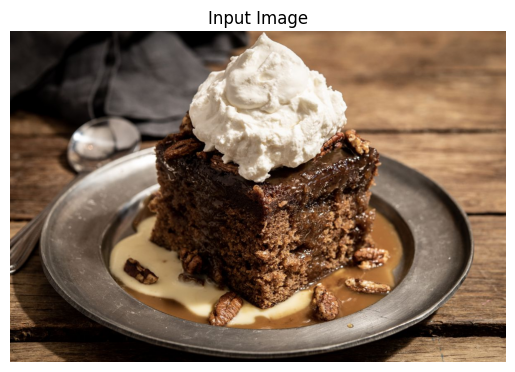

In [3]:
# Visualization code
import matplotlib.pyplot as plt
import os
import cv2
def plot_single_image(img_file_path, title):
  # Load and display the image
  img_bgr = cv2.imread(img_file_path)
  img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
  plt.imshow(img_rgb)
  plt.axis('off')  # Hide axes
  plt.title(title)  # Set the title of the plot
  plt.show()

def visualize_output(input_img_file, output_dir):
  item_dir = os.listdir(output_dir)[0]
  item_res_dir = os.path.join(output_dir, item_dir, 'results')

  final_output_file = os.path.join(item_res_dir, 'final_output.png')
  plot_single_image(input_img_file, title='Input Image')
  plot_single_image(final_output_file, title='Edited Image')

plot_single_image('images/100.png', title='Input Image')

In [4]:


# Set point_number as 6 and per_image_iteration as 7 for faster editing.
# Since runwayml has removed its impressive inpainting model 'runwayml/stable-diffusion-inpainting',
# so just set `--diffusion_model_path 'stabilityai/stable-diffusion-2-inpainting'`.

!torchrun --nnodes=1 --nproc_per_node=1 train.py \
  --image_file_path images/100.png \
  --image_caption 'cake' \
  --editing_prompt 'a chocolate cake with whipped cream and diced strawberries' \
  --diffusion_model_path 'stabilityai/stable-diffusion-2-inpainting' \
  --output_dir output/ \
  --draw_box \
  --lr 5e-3 \
  --max_window_size 15 \
  --per_image_iteration 7 \
  --epochs 1 \
  --num_workers 8 \
  --seed 42 \
  --pin_mem \
  --point_number 6 \
  --batch_size 1

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
2025-01-09 23:22:56.876544: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-09 23:22:56.894632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-09 23:22:56.915859: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN whe

Editing prompt: a chocolate cake with whipped cream and diced strawberries


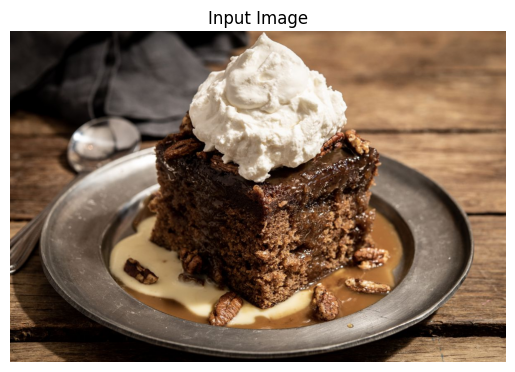

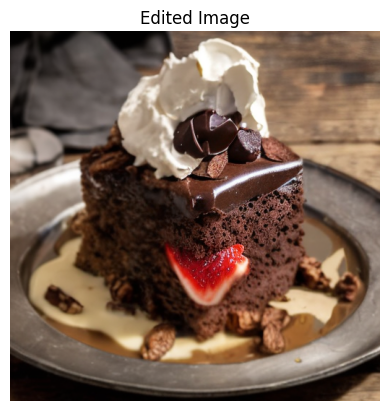

In [5]:
# Visualize the output
print('Editing prompt:', 'a chocolate cake with whipped cream and diced strawberries')
visualize_output('images/100.png', 'output')

**Image 101:**

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
2025-01-09 23:50:37.486209: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-09 23:50:37.505369: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-09 23:50:37.526432: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN whe

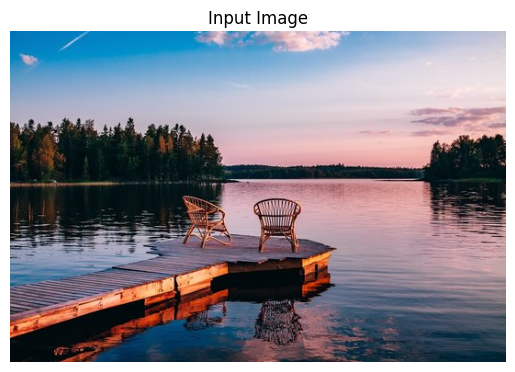

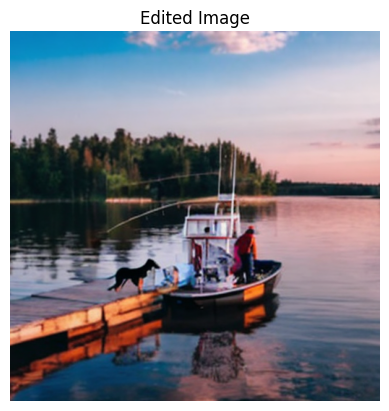

In [12]:
# Visualization code
import matplotlib.pyplot as plt
import os
import cv2
def plot_single_image(img_file_path, title):
  # Load and display the image
  img_bgr = cv2.imread(img_file_path)
  img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
  plt.imshow(img_rgb)
  plt.axis('off')  # Hide axes
  plt.title(title)  # Set the title of the plot
  plt.show()

#def visualize_output(input_img_file, output_dir):
#  item_dir = os.listdir(output_dir)[0]
#  item_res_dir = os.path.join(output_dir, item_dir, 'results')

#  final_output_file = os.path.join(item_res_dir, 'final_output.png')
#  plot_single_image(input_img_file, title='Input Image')
 # plot_single_image(final_output_file, title='Edited Image')

#plot_single_image('images/101.png', title='Input Image')

# Set point_number as 6 and per_image_iteration as 7 for faster editing.
# Since runwayml has removed its impressive inpainting model 'runwayml/stable-diffusion-inpainting',
# so just set `--diffusion_model_path 'stabilityai/stable-diffusion-2-inpainting'`.

!torchrun --nnodes=1 --nproc_per_node=1 train.py \
  --image_file_path images/101.png \
  --image_caption 'lake' \
  --editing_prompt 'a fishing boat on the water and two dogs on the deck”' \
  --diffusion_model_path 'stabilityai/stable-diffusion-2-inpainting' \
  --output_dir output/ \
  --draw_box \
  --lr 5e-3 \
  --max_window_size 15 \
  --per_image_iteration 7 \
  --epochs 1 \
  --num_workers 8 \
  --seed 42 \
  --pin_mem \
  --point_number 6 \
  --batch_size 1
  # Visualize the output
print('Editing prompt:', 'a red fishing boat on the water and on the back of the chairs')
visualize_output('images/101.png', 'output')

**Image 103:**

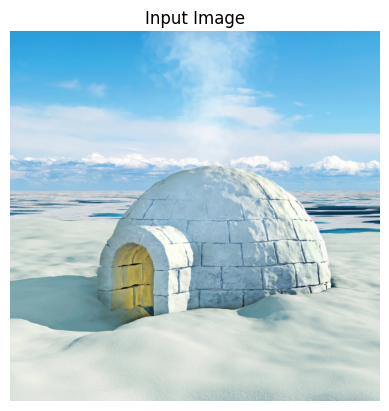

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
2025-01-09 23:57:52.480688: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-09 23:57:52.499752: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-09 23:57:52.521047: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN whe

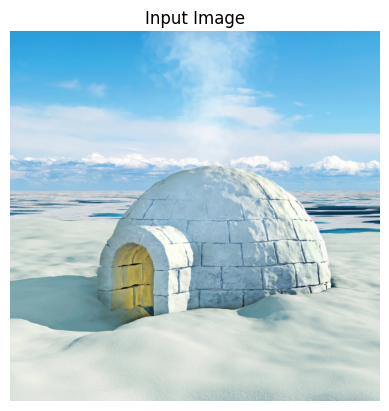

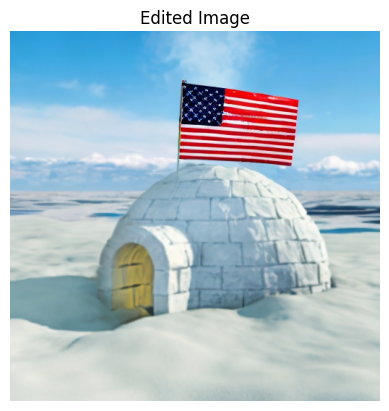

In [14]:
# Visualization code
import matplotlib.pyplot as plt
import os
import cv2
def plot_single_image(img_file_path, title):
  # Load and display the image
  img_bgr = cv2.imread(img_file_path)
  img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
  plt.imshow(img_rgb)
  plt.axis('off')  # Hide axes
  plt.title(title)  # Set the title of the plot
  plt.show()

def visualize_output(input_img_file, output_dir):
  item_dir = os.listdir(output_dir)[-1]
  item_res_dir = os.path.join(output_dir, item_dir, 'results')

  final_output_file = os.path.join(item_res_dir, 'final_output.png')
  plot_single_image(input_img_file, title='Input Image')
  plot_single_image(final_output_file, title='Edited Image')

plot_single_image('images/103.png', title='Input Image')

# Set point_number as 6 and per_image_iteration as 7 for faster editing.
# Since runwayml has removed its impressive inpainting model 'runwayml/stable-diffusion-inpainting',
# so just set `--diffusion_model_path 'stabilityai/stable-diffusion-2-inpainting'`.

!torchrun --nnodes=1 --nproc_per_node=1 train.py \
  --image_file_path images/103.png \
  --image_caption 'igloo' \
  --editing_prompt 'the USA flag flying on top of the igloo' \
  --diffusion_model_path 'stabilityai/stable-diffusion-2-inpainting' \
  --output_dir output/ \
  --draw_box \
  --lr 5e-3 \
  --max_window_size 15 \
  --per_image_iteration 7 \
  --epochs 1 \
  --num_workers 8 \
  --seed 42 \
  --pin_mem \
  --point_number 6 \
  --batch_size 1
  # Visualize the output
print('Editing prompt:', 'the USA flag flying on top of the igloo')
visualize_output('images/103.png', 'output')

**Alpaca**

In [18]:
# Visualization code
import matplotlib.pyplot as plt
import os
import cv2
def plot_single_image(img_file_path, title):
  # Load and display the image
  img_bgr = cv2.imread(img_file_path)
  img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
  plt.imshow(img_rgb)
  plt.axis('off')  # Hide axes
  plt.title(title)  # Set the title of the plot
  plt.show()



# Set point_number as 6 and per_image_iteration as 7 for faster editing.
# Since runwayml has removed its impressive inpainting model 'runwayml/stable-diffusion-inpainting',
# so just set `--diffusion_model_path 'stabilityai/stable-diffusion-2-inpainting'`.

!torchrun --nnodes=1 --nproc_per_node=1 train.py \
  --image_file_path images/104.png \
  --image_caption 'alpaca' \
  --editing_prompt 'a lion with a massive mane' \
  --diffusion_model_path 'stabilityai/stable-diffusion-2-inpainting' \
  --output_dir output/ \
  --draw_box \
  --lr 5e-3 \
  --max_window_size 15 \
  --per_image_iteration 7 \
  --epochs 1 \
  --num_workers 8 \
  --seed 42 \
  --pin_mem \
  --point_number 6 \
  --batch_size 1
  # Visualize the output

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
2025-01-10 00:04:33.842852: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-10 00:04:33.862155: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-10 00:04:33.883167: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN whe

Editing prompt: a lion with a massive mane


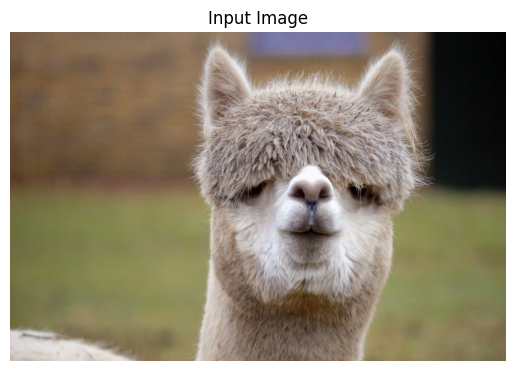

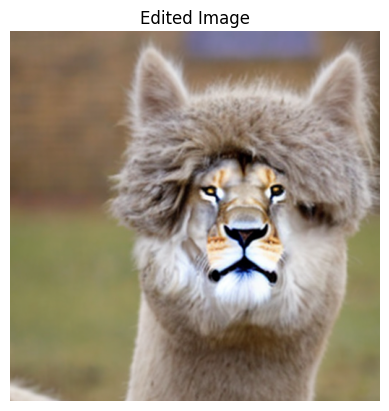

In [17]:

def visualize_output(input_img_file, output_dir):
  item_dir = os.listdir(output_dir)[1]
  item_res_dir = os.path.join(output_dir, item_dir, 'results')

  final_output_file = os.path.join(item_res_dir, 'final_output.png')
  plot_single_image(input_img_file, title='Input Image')
  plot_single_image(final_output_file, title='Edited Image')

print('Editing prompt:', 'a lion with a massive mane')
visualize_output('images/104.png', 'output')